# CNN Architecture

<div style="background-color: #32a852; border-radius: 10px; text-align: center; padding: 10px;">
    
</div>


# TOPIC: Understanding Pooling and Padding in CNN


---

# 1. Desccire the purpose and benefits of pooling in CNN.

Pooling is a very useful concept which is used in Convulution of Neural Networks. Pooling is nothing but just the downsampling of images.By a simple example we can understanf the concept of polling .let's assume, if a image size is (100 * 100) and we applying the polling = 2 in that image.It will gives us a shrinked image of (50 * 50). As we see in our daily life, if the objects are very nearer to our eyes.It will hard to identify them. Pooling is reduces the input image size and filter size will always same.In each complete itresation of filter from the pooled image has give more information to the filter from the previous complete itresion.

The Boxes can Overlap in pooling The one of another benifit of pooling is a less processing of data as image had reduced, which gives it lower computetional cost.

#  Explain the difference between min pooling and max poling.

As we have discussed the concept of pooling, which is down sampling of the image. There are three types of pooling such as
- Max Pooling
- Min Pooling
- Avrage Pooling

The diffrence between min pooling and max pooling is very simple. Max pooling the the most commanly used pooling tachnique, which selecting the most dominating pixels from their box to make a shrinkage image. These boxes my be overlap as according to the strides. While Min pooling aims to capture the least value in a local region, emphasizing the presence of lower-intensity features. It can be useful in certain scenarios, especially when the network needs to be sensitive to the presence of small details.

# Discuss the concept of padding in CNN and its significance.

Padding is just adding one or more zero layers to the outer layer of images , so that the dimensionality of that image has to be saved in their previous size , even after the convolution of that image.In other words, If we give pad=1 , which means we are adding one zero layer to the outer layer of our images to maintain the shape of the image.Zero-padding helps maintain the spatial dimensions of the input, preventing a drastic reduction in the size of the feature maps. This is crucial for retaining spatial information, especially at the borders of the input.

# Compere and contrast zero-padding and valid-padding in terms of their effects on the output feature map size.

As when we don't use any thing for save our spatial information and leting the inputs as raw with zero padding, This senrio is called valid padding or no padding.

- Zero-padding is often preferred when maintaining spatial information, especially at the borders, is critical (e.g., object detection tasks).
- Valid-padding may be suitable when a reduction in spatial dimensions is acceptable, such as in some classification tasks
- Valid-padding is more computationally efficient as it involves fewer calculations due to the absence of padding.

# TOPIC: Exploring LeNet


---

# Provide a brief overview of LeNet Architectiure


LeNet architecture is introduced in 1998 by Yann LeCun and his collaborators.It will popularises in that era for the manual opreations.Lenet is a one of the simplest CNN architecture in the field of deep learning.It has around 60,000 parameters.The architecture was trained using gradient-based optimization methods, such as stochastic gradient descent (SGD).

# Describe the components of Lenet Architecture and their respective purpose.

input layer(32*32) ----> Conv layer(5*5)----> avg pooling (2*2)---->conv (5*5)----> avg pooling(2*2)----> {tanh---> tanh--->softmax} <------fully connected layer


**Input layer :** The input layer has made for 28*28 size gray scale image. Each pixel represents the intensity of the image.

**Convolution layer :**  The convolutional layers are responsible for detecting spatial patterns in the input images.The first convolutional layer has 6 filters of size 5x5, capturing low-level features.
The second convolutional layer has 16 filters of size 5x5, capturing more complex features. Both convolutional layers use the hyperbolic tangent (tanh) activation function.

**Pooling Layers :** he subsampling layers (average pooling layers) follow each convolutional layer and serve to reduce the spatial dimensions of the feature maps, providing a degree of translation invariance.

**Fully connected layers :** The fully connected layers take the high-level features extracted by the convolutional and pooling layers and transform them into a format suitable for classification. Tanh activation function are applied in these layers.The last layer, which is the output layer is assigned with the softmax activation function . Which gives the outputs in the probabilites.


# Discuss the advantages and limitations of LeNet-5 in the context of image classijication tasks .

**Advantages of LeNet-5:**

- Pioneering architecture for image classification with CNNs.
- Hierarchical feature extraction for pattern recognition.
- Translation invariance and robustness to slight translations.
- Effectiveness for handwritten digit recognition.


**Limitations of LeNet-5:**

- Limited capacity compared to modern architectures.
- Small input size may not scale well to larger images.
- Use of tanh activation may lead to vanishing gradient.
- Not suitable for large-scale datasets with diverse objects.
- Average pooling may not be as effective as max pooling.
- Prone to overfitting on complex tasks or datasets.





# Impelement LeNet-5 using a deep learning framework of your choice (e.g., TensocFlow, PyTocch) and train it on a publicaly availabe dataset (e.g., MNIST). Evaluate its performance.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:

# Define the LeNet-5 model
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 9s 6ms/step - loss: 0.2858 - accuracy: 0.9172 - val_loss: 0.1238 - val_accuracy: 0.9633
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1090 - accuracy: 0.9663 - val_loss: 0.0845 - val_accuracy: 0.9728
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.0624 - val_accuracy: 0.9796
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0578 - val_accuracy: 0.9808
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0604 - val_accuracy: 0.9805
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0437 - val_accuracy: 0.9857
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0506 - val_accuracy: 0.9823
Epoch 

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9863
Test Accuracy: 0.986299991607666


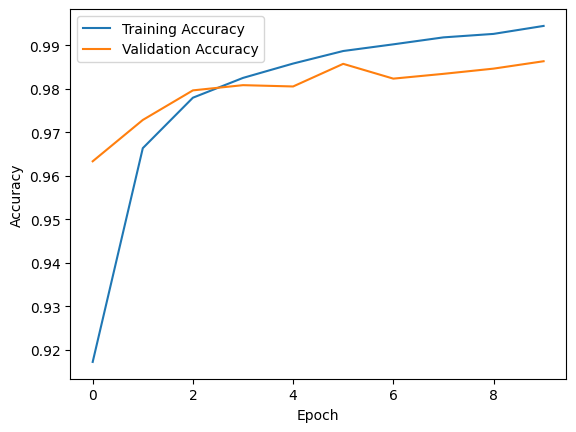

In [8]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# TOPIC: Analyzing AlexNet


---
# Present the overview of the AlexNet Arichitecture.


Alexnet is a one of the usefull arichitecture of CNN , which is devploped by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It had won many awrads in the realm of deep learning. At that time , it was most largest CNN architecture, which has 60 Million parameters. It has total 8 layers in which 5 are convultion layers and rest three are fully connected layers.lexNet is a groundbreaking neural network architecture that demonstrated the power of deep learning for image classification tasks. Its depth, the use of ReLU activation, and the application of techniques like dropout and LRN contributed to its success and influenced subsequent deep learning architectures.Even relu is first time implemented in this architecture.

# Explain the archetctural innovations intcoduced in AlexNet that contributes to its breakthrough performance.


AlexNet's breakthrough performance was attributed to its deep architecture, ReLU activation, local response normalization, overlapping max pooling, large convolutional filters, data augmentation, dropout, GPU acceleration, and parallelization. These innovations collectively enhanced feature learning, reduced overfitting, and made efficient use of computational resources, marking a milestone in the adoption of deep learning for image classification.

# Discuss the role of convolutional layers, pooling layers, and fully connected layers in AlexNet.

**Convolutional layers :**

Convolutional layer is applying the filter on the input image which detect the imgege's data , edages and patterns. Convolution  has doing the feature extraction from the imput image.In AlexNet, the first convolutional layer has 96 filters, followed by subsequent layers with 256, 384, 384, and 256 filters, respectively.

**Pooling Layers :** Pooling layers are hepls to providing the information to the filters.  Pooling layers, specifically max pooling in AlexNet, reduce spatial dimensions by selecting the maximum value within local regions. In AlexNet, three max-pooling layers with overlapping windows and a stride of 2 are employed.These layers are reduces the computetional complexities and impact of overfitting as well.

**Fully Connected Layers :** Fully connected layers are responsible for high-level feature aggregation and classification. In AlexNet, there are three fully connected layers with 4096 neurons each, followed by a final layer with 1000 neurons for ImageNet's 1000 classes

# Implement AlexNet using a deep leacning framework of your choice and evaluate its performance on a dataset of your choice.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess your dataset (replace this with your dataset loading code)
# For demonstration purposes, I'll use the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simplified version of AlexNet
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5501 - accuracy: 0.4329 - val_loss: 1.1925 - val_accuracy: 0.5731
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1296 - accuracy: 0.6059 - val_loss: 0.9751 - val_accuracy: 0.6551
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9596 - accuracy: 0.6667 - val_loss: 0.8717 - val_accuracy: 0.6943
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8391 - accuracy: 0.7091 - val_loss: 0.8706 - val_accuracy: 0.7009
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7512 - accuracy: 0.7390 - val_loss: 0.8112 - val_accuracy: 0.7292
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6754 - accuracy: 0.7658 - val_loss: 0.8119 - val_accuracy: 0.7304
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6117 - accuracy: 0.7846 - val_loss: 0.8061 - val_accuracy

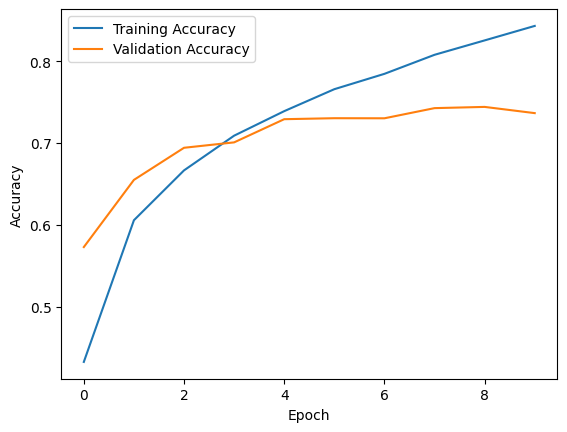

In [16]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
